# MA755 - Team Sandbox

Material from

> "[Hands-On Machine Learning with Scikit-Learn and TensorFlow](http://shop.oreilly.com/product/0636920052289.do)"<br>
by Aurélien Géron
Published by O'Reilly Media, Inc., 2017

Annotations, comments, and implementation on dataset by Angela Su, Tyler Miguel, Sebastian Bury

to do

- Import data
- shrink photos
- train/label (might need to handcode these)
- train model
- get features
- predict on test
- conclude

# Load Libraries 

In [32]:
from __future__ import division, print_function, absolute_import
from skimage import color, io
from scipy.misc import imresize
import numpy as np
from sklearn.cross_validation import train_test_split
import os
from glob import glob

In [ ]:
# might need to use tensor flow libraries

import tflearn
from tflearn.data_utils import shuffle, to_categorical
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.estimator import regression
from tflearn.data_preprocessing import ImagePreprocessing
from tflearn.data_augmentation import ImageAugmentation
from tflearn.metrics import Accuracy

# Import Data

In [77]:
files_path = 'datasets/catsndogs/train/'

In [86]:
cat_files_path = os.path.join(files_path, 'cat.*.jpg')
dog_files_path = os.path.join(files_path, 'dog.*.jpg')

In [87]:
cat_files_path

'datasets/catsndogs/train/cat.*.jpg'

In [88]:
cat_files = sorted(glob(cat_files_path))
dog_files = sorted(glob(dog_files_path))

In [89]:
n_files = len(cat_files) + len(dog_files)
print(n_files)

25000


# Take a look at the data

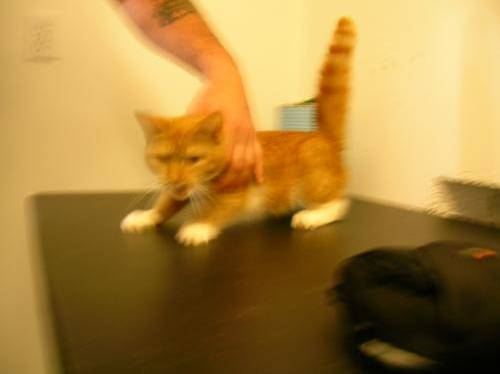

In [17]:
from IPython.display import Image 
Image(filename='datasets/catsndogs/train/cat.0.jpg')

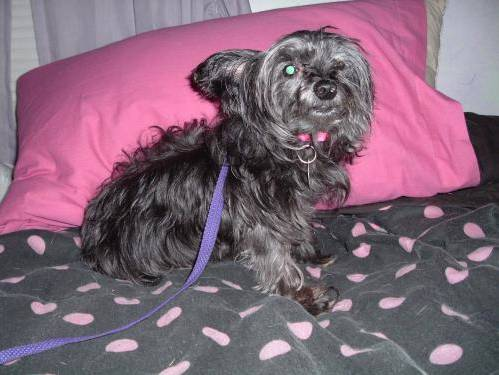

In [96]:
Image(filename='datasets/catsndogs/train/dog.0.jpg')

# resize images

In [97]:
size_image = 28

allX = np.zeros((n_files, size_image, size_image, 3), dtype='float64')
ally = np.zeros(n_files)
count = 0
for f in cat_files:
    try:
        img = io.imread(f)
        new_img = imresize(img, (size_image, size_image, 3))
        allX[count] = np.array(new_img)
        ally[count] = 0
        count += 1
    except:
        continue

In [98]:
for f in dog_files:
    try:
        img = io.imread(f)
        new_img = imresize(img, (size_image, size_image, 3))
        allX[count] = np.array(new_img)
        ally[count] = 1
        count += 1
    except:
        continue

# split the data

In [99]:
X, X_test, Y, Y_test = train_test_split(allX, ally, test_size=0.1, random_state=42)

In [100]:
Y = to_categorical(Y, 2)
Y_test = to_categorical(Y_test, 2)

NameError: name 'to_categorical' is not defined